<a href="https://colab.research.google.com/github/mrella/finance/blob/main/drawdown_medio_tickers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance #--upgrade yfinance==0.2.54
!pip install lxml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 34.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.4/118.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 117.4 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.18.1-cp311-cp311-linux_x86_64.whl size=886609 sha256=d82d1c4d7f11e16a50eb34c46ca1b98a441db0b20802b86f4067ffa6aff0ac1c
  Stored in directory: /root/.cache/pip/wheels/25/cb/79/a133a0d1d75f318a96614ed7fb97bdf2f35a7b6c4d4e426e3f
Successfully built peewee
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 44.7 MB/s eta 0:00:00


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
from datetime import datetime, timedelta
import warnings

warnings.filterwarnings('ignore')
sns.set_theme(style="darkgrid", palette="muted", font_scale=1.1)


In [3]:
def drawdown_medio_tickers_img(tickers, fecha_inicio, fecha_fin, titulo, indice):


  data = yf.download(tickers, start=fecha_inicio, end=fecha_fin)['Close']
  data_index = yf.download(indice, start=fecha_inicio, end=fecha_fin)['Close']

  # Crear un DataFrame para almacenar los resultados
  drawdowns = []


  # Calcular drawdown para cada ticker
  print("Calculando drawdowns...")
  for ticker in tickers:
      if ticker in data.columns:
          stock_data = data[ticker].dropna()

          if not stock_data.empty:
              max_price = stock_data.max()
              # Precio más reciente
              latest_price = stock_data.iloc[-1]
              # Calcular drawdown
              drawdown = (latest_price - max_price) / max_price
              drawdowns.append({'Ticker': ticker, 'Drawdown': drawdown})

  # Crear DataFrame con los drawdowns
  drawdown_df = pd.DataFrame(drawdowns).sort_values(by='Drawdown')

  # Calcular la mediana y el índice
  median_drawdown = drawdown_df['Drawdown'].median()
  index_drawdown = (data.mean(axis=1).iloc[-1] - data.mean(axis=1).max()) / data.mean(axis=1).max()

  # Graficar
  plt.figure(figsize=(12, 8))
  plt.bar(range(len(drawdown_df)), drawdown_df['Drawdown'], color='gray', alpha=0.7)
  plt.axhline(y=median_drawdown, color='green', linestyle='--', label=f'Median Stock: {median_drawdown:.1%}')
  plt.axhline(y=index_drawdown, color='red', linestyle='-', label=f'Index: {index_drawdown:.1%}')

  # Añadir etiquetas y título
  plt.title(f'{titulo} components drawdown {fecha_fin} ')
  plt.ylabel('Drawdown (%)')
  plt.xlabel('Stocks (sorted by drawdown)')
  plt.xticks([], [])  # Ocultar los nombres de los tickers en el eje x
  plt.legend()
  plt.show()


[*********************100%***********************]  503 of 503 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2025-01-01 -> 2025-06-16)')
ERROR:yfinance:['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Calculando drawdowns...


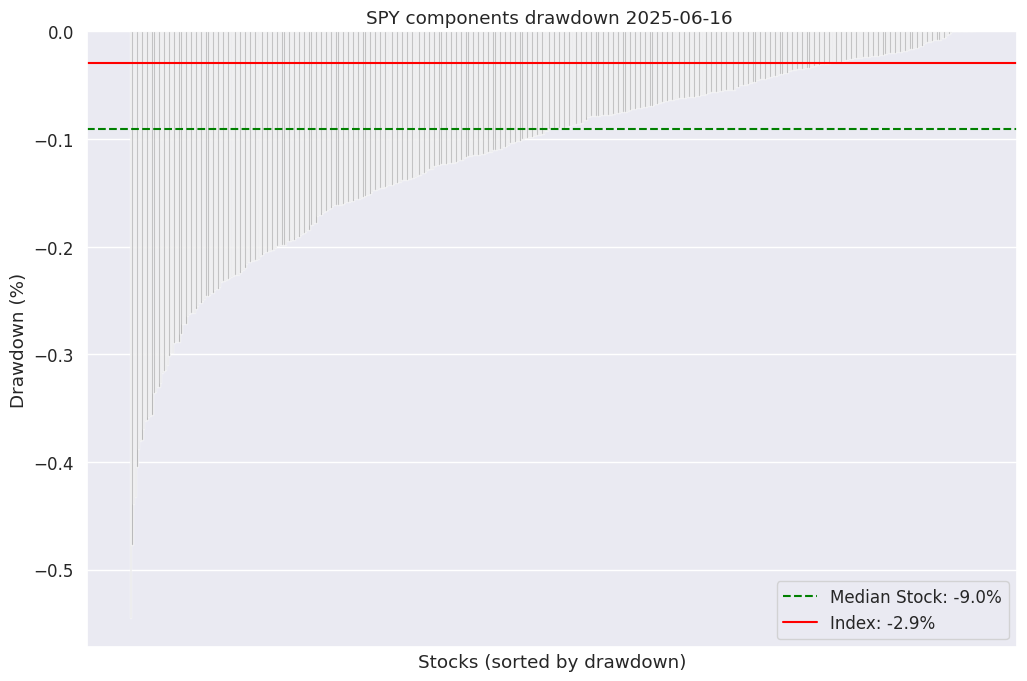

In [4]:
##### parametros iniciales
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()

fecha_inicio = f"{datetime.now().year}-01-01"
fecha_fin = (datetime.now() - timedelta(days=1)).strftime("%Y-%m-%d")
titulo = "SPY"
indice = "SPY"
#####
drawdown_medio_tickers_img(tickers, fecha_inicio, fecha_fin, titulo, indice)

[*********************100%***********************]  101 of 101 completed
[*********************100%***********************]  1 of 1 completed


Calculando drawdowns...


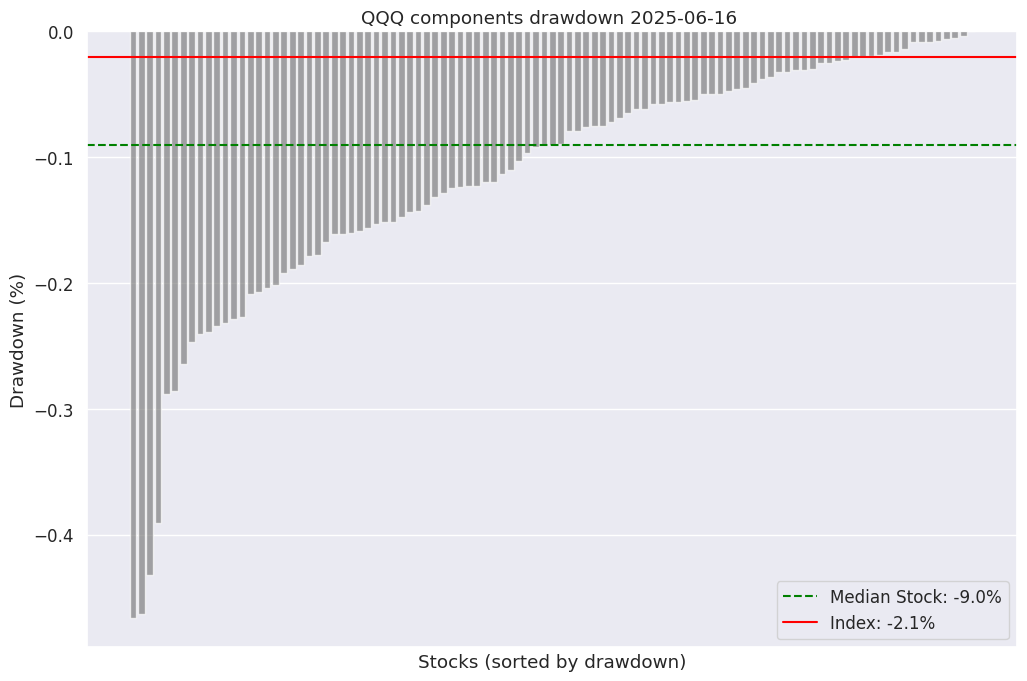

In [5]:
##### parametros iniciales
tickers = [
    "AAPL","ABNB","ADBE","ADI","ADP","ADSK","AEP","AMAT","AMD","AMGN",
    "AMZN","ANSS","APP","ARM","ASML","AVGO","AXON","AZN","BIIB","BKNG",
    "BKR","CCEP","CDNS","CDW","CEG","CHTR","CMCSA","COST","CPRT","CRWD",
    "CSCO","CSGP","CSX","CTAS","CTSH","DASH","DDOG","DXCM","EA","EXC",
    "FANG","FAST","FTNT","GEHC","GFS","GILD","GOOG","GOOGL","HON","IDXX",
    "INTC","INTU","ISRG","KDP","KHC","KLAC","LIN","LRCX","LULU","MAR",
    "MCHP","MDLZ","MELI","META","MNST","MRVL","MSFT","MSTR","MU","NFLX",
    "NVDA","NXPI","ODFL","ON","ORLY","PANW","PAYX","PCAR","PDD","PEP",
    "PLTR","PYPL","QCOM","REGN","ROP","ROST","SBUX","SHOP","SNPS","TEAM",
    "TMUS","TSLA","TTD","TTWO","TXN","VRSK","VRTX","WBD","WDAY","XEL","ZS"
]
fecha_inicio = f"{datetime.now().year}-01-01"
fecha_fin = (datetime.now() - timedelta(days=1)).strftime("%Y-%m-%d")
titulo = "QQQ"
indice = "QQQ"
#####
drawdown_medio_tickers_img(tickers, fecha_inicio, fecha_fin, titulo, indice)

In [6]:
def drawdown_medio_tickers_video(tickers, fecha_inicio, fecha_fin, titulo, indice):

  print(f"Descargando datos de los tickers {tickers}...")
  data = yf.download(tickers, start=fecha_inicio, end=fecha_fin)['Close']
  data_index = yf.download(indice, start=fecha_inicio, end=fecha_fin)['Close']

  # Configurar variables para la animación

  dates = data.index  # Fechas disponibles
  drawdowns_history = []

  # Precalcular drawdowns para cada fecha
  print("Calculando drawdowns...")
  for i in range(len(dates)):
      current_date = dates[i]
      window_data = data.iloc[0:i]
      drawdowns = []

      for ticker in data.columns:
          if ticker in window_data:
              stock_data = window_data[ticker].dropna()

              if not stock_data.empty:
                  max_price = stock_data.max()
                  latest_price = stock_data.iloc[-1]
                  drawdown = (latest_price - max_price) / max_price if max_price > 0 else 0
                  drawdowns.append(drawdown)

      # Almacenar drawdowns del día actual
      median_drawdown = pd.Series(drawdowns).median()
      up_to_date = data_index.loc[:current_date]
      #print(median_drawdown)
      #index_drawdown = (data.mean(axis=1).iloc[-1] - data_index.mean(axis=1).max()) / data_index.mean(axis=1).max()
      index_drawdown = float(( data_index.iloc[i]-data_index.iloc[1]) /  data_index.iloc[1])

      #print(index_drawdown)

      drawdowns_history.append((current_date, sorted(drawdowns), median_drawdown, up_to_date , index_drawdown ))

  #print (drawdowns_history)

  # Función para actualizar cada frame en la animación
  def update(frame):
      # Limpiar la figura completa antes de actualizar
      fig.clear()

      # Obtener los datos para el frame actual
      current_date, drawdowns, median_drawdown, up_to_date, index_drawdown = drawdowns_history[frame]

      # Crear subgráfico 1: Drawdowns
      ax1 = fig.add_subplot(2, 1, 1)
      ax1.bar(range(len(drawdowns)), drawdowns, color='gray', alpha=0.7)
      ax1.axhline(y=median_drawdown, color='green', linestyle='--', label=f'Median Stock: {median_drawdown:.1%}')
      ax1.axhline(y=index_drawdown, color='red', linestyle='-', label=f'{titulo} Index: {index_drawdown:.1%}')
      ax1.set_title(f'{titulo} Drawdowns as of {current_date.strftime("%Y-%m-%d")}')
      ax1.set_ylabel('Drawdown (%)')
      ax1.set_xticks([])  # Ocultar nombres de acciones
      ax1.legend()

      # Crear subgráfico 2: Precio del SPY
      ax2 = fig.add_subplot(2, 1, 2)
      ax2.plot(up_to_date.index, up_to_date.values, color='blue', label='Price')
      ax2.set_title('Price Evolution')
      ax2.set_ylabel('Price ($)')
      ax2.set_xlabel('Date')
      ax2.legend()


  # Crear la figura para la animación
  fig = plt.figure(figsize=(12, 10))

  # Crear la animación
  ani = FuncAnimation(fig, update, frames=len(drawdowns_history), repeat=False)

  # Guardar como video
  print(f"Generando animación {titulo} ...")
  ani.save(f"{titulo}_drawdowns.mp4", writer='ffmpeg', fps=3)
  print(f"Animación {titulo} completada...")

In [ ]:
##### parametros iniciales
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()
fecha_inicio = f"{datetime.now().year}-01-01"
fecha_fin = (datetime.now() - timedelta(days=1)).strftime("%Y-%m-%d")
titulo = "SPY"
indice = "SPY"
#####
drawdown_medio_tickers_video(tickers, fecha_inicio, fecha_fin, titulo, indice)

[                       0%                       ]

Descargando datos de los tickers ['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'APO', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BAX', 'BDX', 'BRK.B', 'BBY', 'TECH', 'BIIB', 'BLK', 'BX', 'BK', 'BA', 'BKNG', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BLDR', 'BG', 'BXP', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CAT', 'CBOE', 'CBRE', 'CDW', 'COR', 'CNC', 'CNP', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'COIN', 'CL', 'CMCSA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CRWD', 'CCI', 'CSX', 'CM

[**********************86%****************       ]  431 of 503 completedERROR:yfinance:HTTP Error 401: 
[*********************100%***********************]  503 of 503 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2025-01-01 -> 2025-06-16)')
ERROR:yfinance:['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Calculando drawdowns...
Generando animación SPY ...


In [ ]:
##### parametros iniciales
tickers = [
    "AAPL","ABNB","ADBE","ADI","ADP","ADSK","AEP","AMAT","AMD","AMGN",
    "AMZN","ANSS","APP","ARM","ASML","AVGO","AXON","AZN","BIIB","BKNG",
    "BKR","CCEP","CDNS","CDW","CEG","CHTR","CMCSA","COST","CPRT","CRWD",
    "CSCO","CSGP","CSX","CTAS","CTSH","DASH","DDOG","DXCM","EA","EXC",
    "FANG","FAST","FTNT","GEHC","GFS","GILD","GOOG","GOOGL","HON","IDXX",
    "INTC","INTU","ISRG","KDP","KHC","KLAC","LIN","LRCX","LULU","MAR",
    "MCHP","MDLZ","MELI","META","MNST","MRVL","MSFT","MSTR","MU","NFLX",
    "NVDA","NXPI","ODFL","ON","ORLY","PANW","PAYX","PCAR","PDD","PEP",
    "PLTR","PYPL","QCOM","REGN","ROP","ROST","SBUX","SHOP","SNPS","TEAM",
    "TMUS","TSLA","TTD","TTWO","TXN","VRSK","VRTX","WBD","WDAY","XEL","ZS"
]
fecha_inicio = f"{datetime.now().year}-01-01"
fecha_fin = (datetime.now() - timedelta(days=1)).strftime("%Y-%m-%d")
titulo = "QQQ"
indice = "QQQ"
#####
drawdown_medio_tickers_video(tickers, fecha_inicio, fecha_fin, titulo, indice)

Videos guardados en la carpeta:
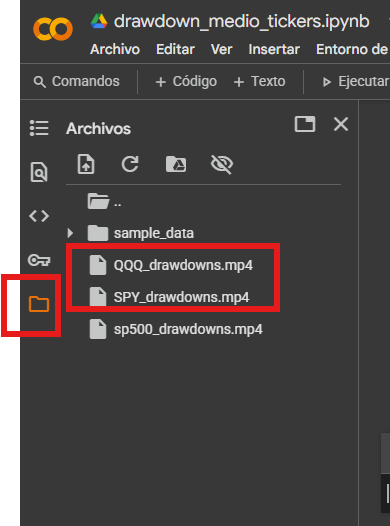